In [1]:
import numpy as np
import pandas as pd
from scipy import stats, special
import matplotlib.pyplot as plt
import seaborn as sns
import importlib.util,os,time
from matplotlib.lines import Line2D
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [2]:
# functions
def boxtpm(x, lmbda):
    return special.inv_boxcox(x, lmbda)

#https://stackoverflow.com/questions/30657453/fitting-a-straight-line-to-a-log-log-curve-in-matplotlib
def powerfit(x, y, xnew):
    """line fitting on log-log scale"""
    k, m = np.polyfit(np.log(x), np.log(y), 1)
    return np.exp(m) * xnew**(k)

def fix_pvals(x):
    if x < 1e-16:
        x=1e-16
    return x

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    #title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, **kws)

In [3]:
# data params
folder = '../data/'
names_plot = ['Promoter','5UTR','3UTR','Terminator']
limits = np.array([[0,400],[400,500],[500,750],[750,1000]])
label_names =["0_none", "1_low", "2_medium", "3_high"]
lmbda = 0.22
corrf = stats.spearmanr
n_samples = 64


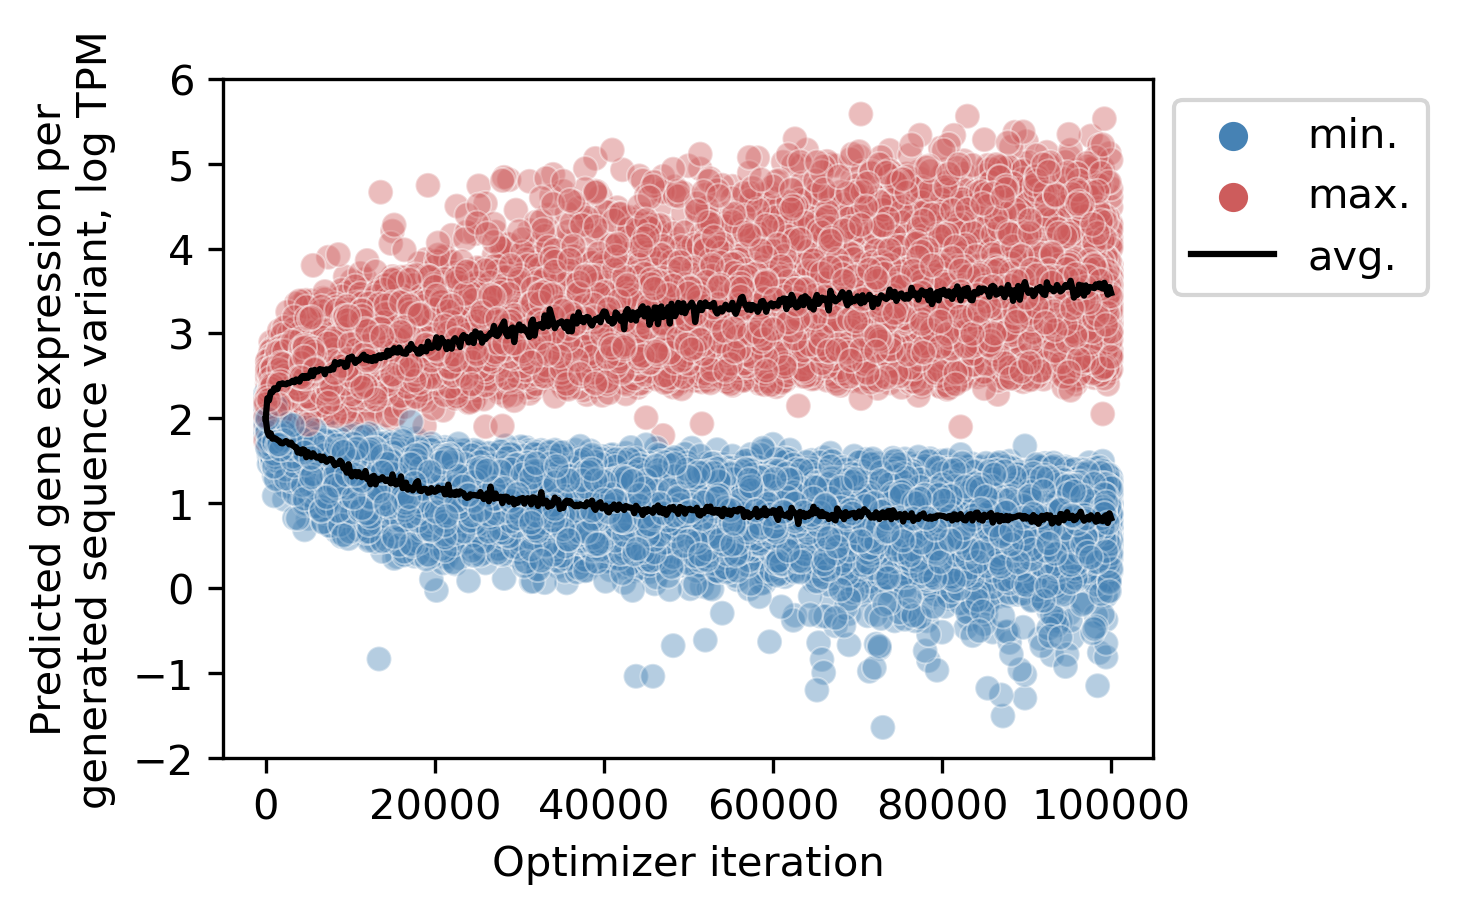

In [4]:
# plot min max
tmp = pd.read_csv(folder+'Optimization_200d_bal_200k_dframe_seqs_subsample_64k.csv')
tmp['ylog'] = np.log10(tmp.y_tpm)

mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=(4,3))
tmp.iter.sort_values().unique()
ax = sns.scatterplot(data=tmp,
               x='iter',y='ylog',
               hue='optimization',alpha=0.4,
               palette=['steelblue','indianred'])
avg = (tmp
         .groupby(['optimization','iter'])
         .ylog.median()
         .reset_index()
      )
plt.plot(avg.query('optimization=="max"').iter,
         avg.query('optimization=="max"').ylog,
         c='k')
plt.plot(avg.query('optimization=="min"').iter,
         avg.query('optimization=="min"').ylog,
         c='k',label='avg.')

plt.ylim(-2,6)
plt.xlabel('Optimizer iteration')
plt.ylabel('Predicted gene expression per\ngenerated sequence variant, log TPM')

handles, labels = ax.get_legend_handles_labels()
plt.legend([handles[1],handles[2],handles[0]],
           ['min.','max.',labels[0]],
           bbox_to_anchor=(1,1)
          )
plt.show()


In [5]:
# text values
# 40% increase on the level of order of magnitudes
print(np.log10(tmp.y_tpm.max()-tmp.y_tpm.min())/np.log10(1e4)) 

# dynamic range
print(np.log10(tmp.y_tpm.max()-tmp.y_tpm.min()))

1.3957941654185024
5.58317666167401


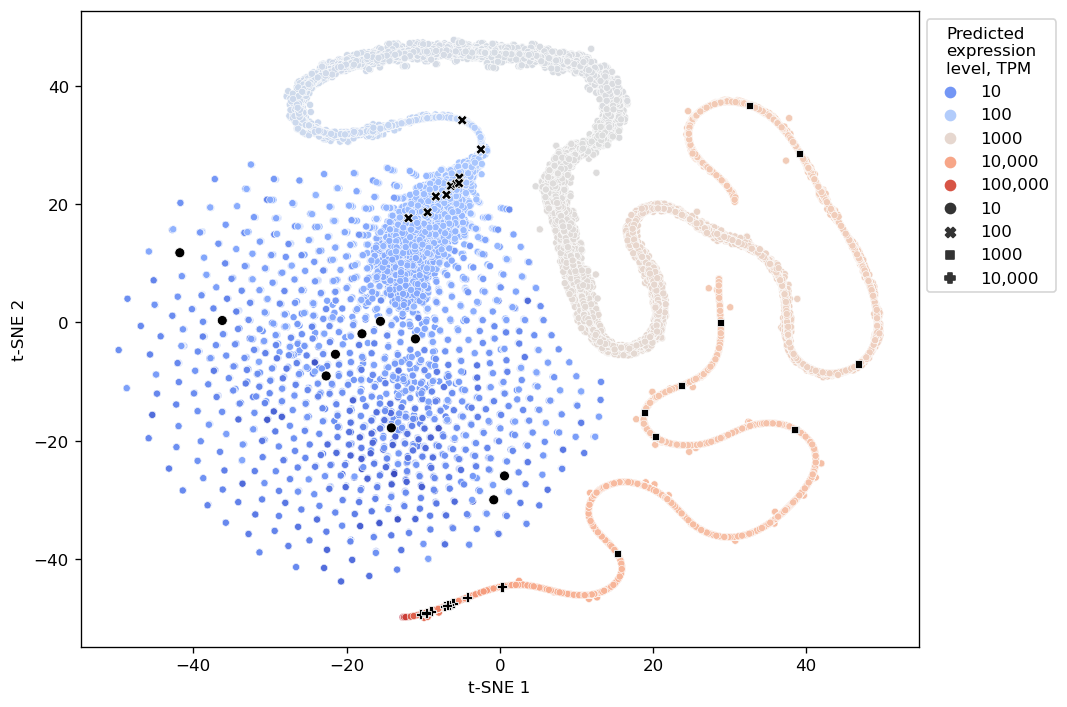

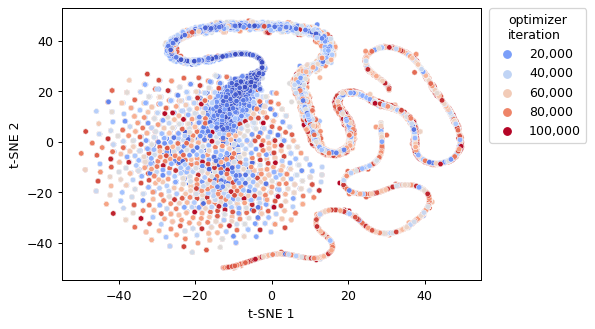

In [6]:
# TSNE plots of sequence optimization

df4 = pd.read_csv(folder+'tsne_p300_minmax_bal_200d_iter_combined_64k.csv')
# plot
mpl.rcParams['figure.dpi'] = 120
plt.figure(figsize=(9,6))
g = sns.scatterplot(data=df4.query('type=="all"'),
                    x='tsne_d1',y='tsne_d2',
                    hue='tpm',palette="coolwarm",size=5, 
                   )
sns.scatterplot(data=df4.query('correct_bin!="0"').query('type=="sampled"'),
                x='tsne_d1',y='tsne_d2',sizes=50,
                color='k',style='correct_bin',
               )

plt.legend(['_','10','100','1000','10,000','100,000','_','_','10','100','1000','10,000'],
           bbox_to_anchor=(1, 1), 
          title='Predicted\nexpression\nlevel, TPM')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.tight_layout()
#plt.savefig('fig3c.png')
plt.show()

# plot
mpl.rcParams['figure.dpi'] = 90
g = sns.scatterplot(data=df4,x='tsne_d1',y='tsne_d2',
            hue='iter',palette="coolwarm",size=5)
plt.legend(['_','20,000','40,000','60,000','80,000','100,000'],
           bbox_to_anchor=(1.02, 1), 
           loc=2, borderaxespad=0.,
          title='optimizer\niteration')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()